# Tree-Based Models

Decision Tree, Bagging, Random Forests

Jun Song


In [ ]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ISLP

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    BaggingRegressor,
    RandomForestRegressor,
    GradientBoostingRegressor,
)
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn import tree

## Load ``Hitters`` Data

Documnetation: https://islp.readthedocs.io/en/latest/datasets/Hitters.html
Major League Baseball Data from the 1986 and 1987 seasons.

``AtBat``: 1986년 타석 수

``Hits``: 1986년 안타 수

``HmRun``: 1986년 홈런 수

``Runs``: 1986년 득점 수

``RBI``: 1986년 타점 수

``Walks``: 1986년 볼넷 수

``Years``: 메이저 리그 경력 연수

``CAtBat``: 전체 경력 동안의 타석 수

``CHits``: 전체 경력 동안의 안타 수

``CHmRun``: 전체 경력 동안의 홈런 수

``CRuns``: 전체 경력 동안의 득점 수

``CRBI``: 전체 경력 동안의 타점 수

``CWalks``: 전체 경력 동안의 볼넷 수

``League``: 1986년 시즌 종료 시 선수의 리그를 나타내는 A와 N 수준을 가진 요인

``Division``: 1986년 시즌 종료 시 선수의 디비전을 나타내는 E와 W 수준을 가진 요인

``PutOuts``: 1986년 아웃 처리 수

``Assists``: 1986년 어시스트 수

``Errors``: 1986년 실책 수

``Salary``: 1987년 개막일 기준 연봉(천 달러 단위)

``NewLeague``: 1987년 시즌 시작 시 선수의 리그를 나타내는 A와 N 수준을 가진 요인

-- Claude 3.5 Sonnet

In [ ]:
df = ISLP.load_data("Hitters")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      322 non-null    int64   
 1   Hits       322 non-null    int64   
 2   HmRun      322 non-null    int64   
 3   Runs       322 non-null    int64   
 4   RBI        322 non-null    int64   
 5   Walks      322 non-null    int64   
 6   Years      322 non-null    int64   
 7   CAtBat     322 non-null    int64   
 8   CHits      322 non-null    int64   
 9   CHmRun     322 non-null    int64   
 10  CRuns      322 non-null    int64   
 11  CRBI       322 non-null    int64   
 12  CWalks     322 non-null    int64   
 13  League     322 non-null    category
 14  Division   322 non-null    category
 15  PutOuts    322 non-null    int64   
 16  Assists    322 non-null    int64   
 17  Errors     322 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  322 non-null    ca

In [ ]:
df = ISLP.load_data("Hitters").dropna()
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AtBat      263 non-null    int64   
 1   Hits       263 non-null    int64   
 2   HmRun      263 non-null    int64   
 3   Runs       263 non-null    int64   
 4   RBI        263 non-null    int64   
 5   Walks      263 non-null    int64   
 6   Years      263 non-null    int64   
 7   CAtBat     263 non-null    int64   
 8   CHits      263 non-null    int64   
 9   CHmRun     263 non-null    int64   
 10  CRuns      263 non-null    int64   
 11  CRBI       263 non-null    int64   
 12  CWalks     263 non-null    int64   
 13  League     263 non-null    category
 14  Division   263 non-null    category
 15  PutOuts    263 non-null    int64   
 16  Assists    263 non-null    int64   
 17  Errors     263 non-null    int64   
 18  Salary     263 non-null    float64 
 19  NewLeague  263 non-null    categor

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


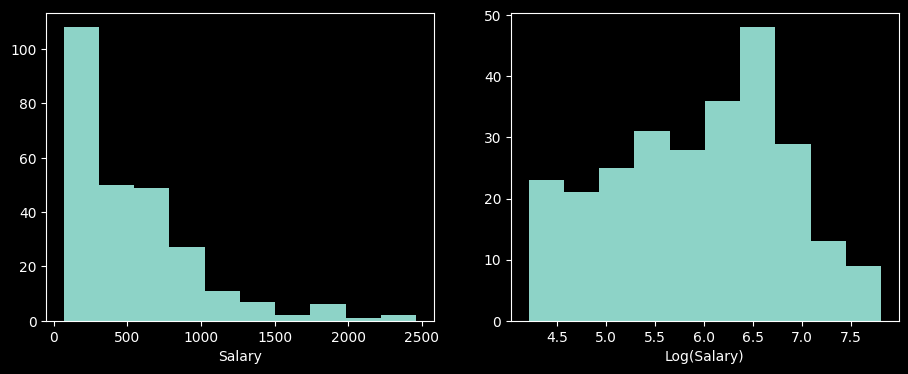

In [ ]:
X = df[["Years", "Hits"]].values
y = np.log(df.Salary.values)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))
ax1.hist(df.Salary.values)
ax1.set_xlabel("Salary")
ax2.hist(y)
ax2.set_xlabel("Log(Salary)")

## Decision Tree (Regression)

데이터 크기: (322, 20)
Salary NaN 개수: 59
Salary 최솟값: 67.5
Salary 최댓값: 2460.0
y에 NaN 개수: 59
y에 -inf 개수: 0
유효한 데이터 개수: 263
NaN 또는 -inf 값이 발견되어 해당 행들을 제거합니다.


[Text(0.4, 0.8333333333333334, 'Years <= 4.5\nsquared_error = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(0.2, 0.5, 'squared_error = 0.471\nsamples = 90\nvalue = 5.107'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'Hits <= 117.5\nsquared_error = 0.42\nsamples = 173\nvalue = 6.354'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'squared_error = 0.312\nsamples = 90\nvalue = 5.998'),
 Text(0.8, 0.16666666666666666, 'squared_error = 0.252\nsamples = 83\nvalue = 6.74')]

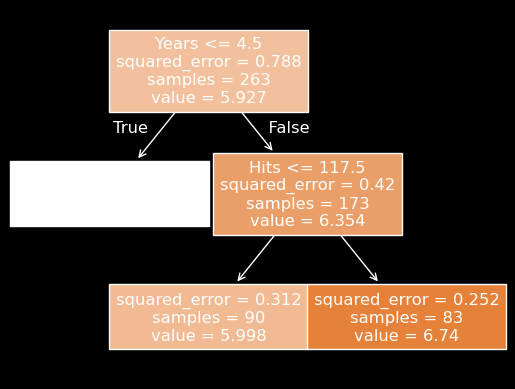

In [6]:
# Reproduce the figure
# NaN 값이 제거된 데이터 사용 (Cell 4에서 이미 dropna() 적용됨)
print(f"데이터 크기: {df.shape}")
print(f"Salary NaN 개수: {df.Salary.isna().sum()}")
print(f"Salary 최솟값: {df.Salary.min()}")
print(f"Salary 최댓값: {df.Salary.max()}")

X = df[["Years", "Hits"]].values
y = np.log(df.Salary.values)
print(f"y에 NaN 개수: {np.isnan(y).sum()}")
print(f"y에 -inf 개수: {np.isinf(y).sum()}")

# NaN이나 -inf 값이 있는 경우 해당 행들을 제거
valid_mask = np.isfinite(y)
print(f"유효한 데이터 개수: {valid_mask.sum()}")

if not valid_mask.all():
    print("NaN 또는 -inf 값이 발견되어 해당 행들을 제거합니다.")
    X = X[valid_mask]
    y = y[valid_mask]

regr = DecisionTreeRegressor(max_leaf_nodes=3)
regr.fit(X, y)
tree.plot_tree(regr, filled=True, feature_names=["Years", "Hits"])

Text(11, 170, 'R3')

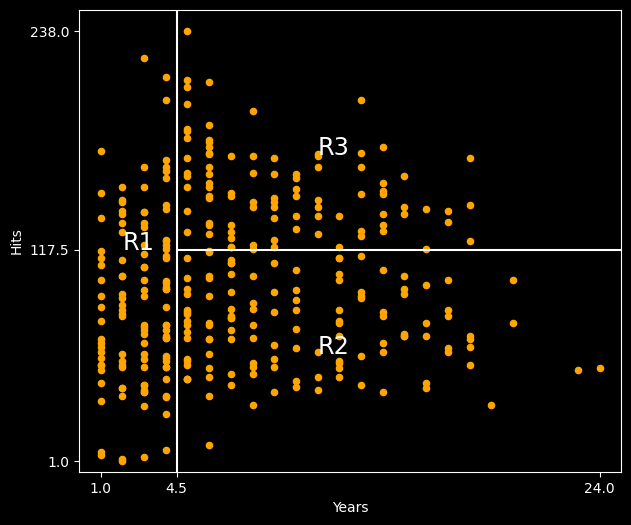

In [7]:
df.plot("Years", "Hits", kind="scatter", color="orange", figsize=(7, 6))
plt.xlim(0, 25)
plt.ylim(ymin=-5)
plt.xticks([1, 4.5, 24])
plt.yticks([1, 117.5, 238])
plt.vlines(4.5, ymin=-5, ymax=250)
plt.hlines(117.5, xmin=4.5, xmax=25)
plt.annotate("R1", xy=(2, 117.5), fontsize="xx-large")
plt.annotate("R2", xy=(11, 60), fontsize="xx-large")
plt.annotate("R3", xy=(11, 170), fontsize="xx-large")

In [8]:
# training MSE
from sklearn.metrics import mean_squared_error

y_pred = regr.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Root MSE: {np.sqrt(mse)}")

Root MSE: 0.5892895371216638


In [10]:
# 다른 데이터도 다 써보자
regr = DecisionTreeRegressor(max_leaf_nodes=3)
X = df.drop("Salary", axis=1)
# sklearn 의 decision tree 인풋은 numeric만 취급. get dummy
X = pd.get_dummies(X, columns=["League", "Division", "NewLeague"], drop_first=True)

# X와 y의 크기가 맞는지 확인
print(f"X 크기: {X.shape}")
print(f"y 크기: {y.shape}")

# 크기가 다르면 y를 다시 생성 (NaN 값이 제거된 데이터에서)
if X.shape[0] != len(y):
    print("X와 y의 크기가 다릅니다. y를 다시 생성합니다.")
    y = np.log(df.Salary.values)
    # NaN이나 -inf 값이 있는 경우 해당 행들을 제거
    valid_mask = np.isfinite(y)
    X = X[valid_mask]
    y = y[valid_mask]
    print(f"수정된 X 크기: {X.shape}")
    print(f"수정된 y 크기: {y.shape}")

regr.fit(X, y)

X 크기: (322, 19)
y 크기: (263,)
X와 y의 크기가 다릅니다. y를 다시 생성합니다.
수정된 X 크기: (263, 19)
수정된 y 크기: (263,)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,3
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.6, 0.8333333333333334, 'CAtBat <= 1452.0\nsquared_error = 0.788\nsamples = 263\nvalue = 5.927'),
 Text(0.4, 0.5, 'CHits <= 182.0\nsquared_error = 0.352\nsamples = 103\nvalue = 5.093'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.328\nsamples = 56\nvalue = 4.771'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.11\nsamples = 47\nvalue = 5.476'),
 Text(0.8, 0.5, 'squared_error = 0.332\nsamples = 160\nvalue = 6.464'),
 Text(0.7, 0.6666666666666667, '  False')]

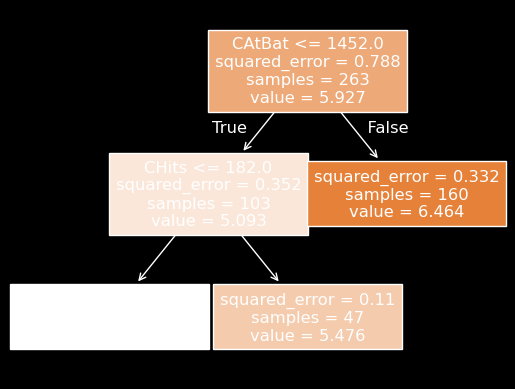

In [11]:
tree.plot_tree(regr, filled=True, feature_names=X.columns)

위 그림에서 오류가 날 경우 ``Graphviz``가 깔려있지 않아서 그럴 수 있음.

In [12]:
# Training MSE
y_pred = regr.predict(X)
mse = mean_squared_error(y, y_pred)
print(f"Root MSE: {np.sqrt(mse)}")

Root MSE: 0.5396807229933368


## Decision Tree (Classification)

### Heart Failure Clinical Record

심부전 환자 dataset posted in 2020
- Dataset Description: https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
- Detailed explanation with analysis in the paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6998201/

| Variable Name | Role | Type | Demographic | Description | Units | Missing Values |
|---------------|------|------|-------------|-------------|-------|----------------|
| age | Feature | Integer | Age | age of the patient<br>(환자의 나이) | years | no |
| anaemia | Feature | Binary | | decrease of red blood cells or hemoglobin<br>(적혈구 또는 헤모글로빈 감소) | | no |
| creatinine_phosphokinase | Feature | Integer | | level of the CPK enzyme in the blood<br>(혈액 내 CPK 효소 수치) | mcg/L | no |
| diabetes | Feature | Binary | | if the patient has diabetes<br>(환자의 당뇨병 유무) | | no |
| ejection_fraction | Feature | Integer | | percentage of blood leaving the heart at each contraction<br>(각 심장 수축 시 박출되는 혈액의 비율) | % | no |
| high_blood_pressure | Feature | Binary | | if the patient has hypertension<br>(환자의 고혈압 유무) | | no |
| platelets | Feature | Continuous | | platelets in the blood<br>(혈액 내 혈소판 수) | kiloplatelets/mL | no |
| serum_creatinine | Feature | Continuous | | level of serum creatinine in the blood<br>(혈액 내 혈청 크레아티닌 수치) | mg/dL | no |
| serum_sodium | Feature | Integer | | level of serum sodium in the blood<br>(혈액 내 혈청 나트륨 수치) | mEq/L | no |
| sex | Feature | Binary | Sex | woman or man<br>(여성 또는 남성) | | no |
| smoking | Feature | Binary | | if the patient smokes or not<br>(환자의 흡연 여부) | | no |
| time | Feature | Integer | | follow-up period<br>(추적 관찰 기간) | days | no |
| death_event | Target | Binary | | if the patient died during the follow-up period<br>(추적 관찰 기간 중 환자의 사망 여부) | | no |




In [13]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
# Just rename it for simplicity
df["CPK"] = df["creatinine_phosphokinase"]
df = df.drop("creatinine_phosphokinase", axis=1)

# Feature Types
numerical_features = [
    "age",
    "CPK",
    "ejection_fraction",
    "platelets",
    "serum_creatinine",
    "serum_sodium",
    "time",
]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

### Continuous Type

/var/folders/wg/2hx7hs9173z96lq9jg780d840000gn/T/ipykernel_1324/2459903584.py:9: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/wg/2hx7hs9173z96lq9jg780d840000gn/T/ipykernel_1324/2459903584.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/wg/2hx7hs9173z96lq9jg780d840000gn/T/ipykernel_1324/2459903584.py:17: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/var/folders/wg/2hx7hs9173z96lq9jg780d840000gn/T/ipykernel_1324/2459903584.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

 

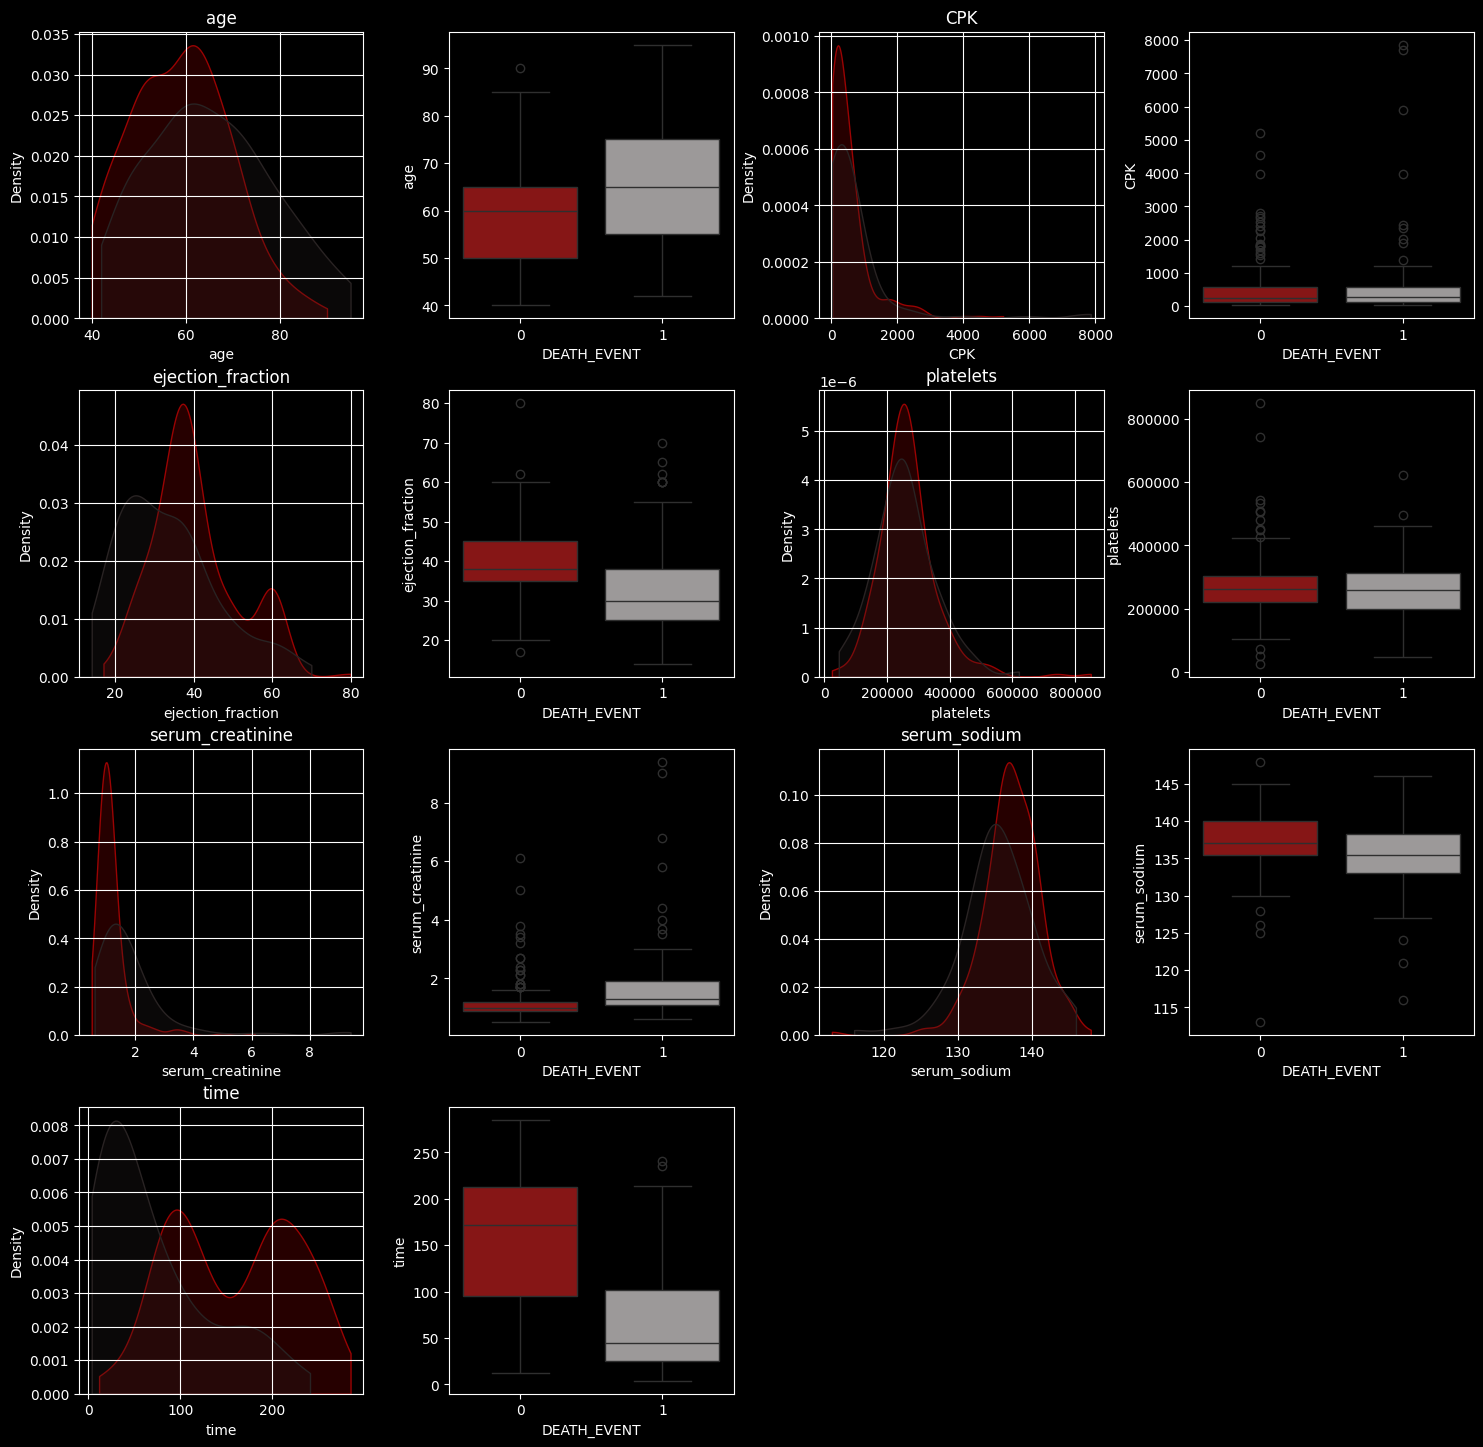

In [15]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i * 2 + 1)
    plt.subplots_adjust(hspace=0.25, wspace=0.3)

    plt.grid(True)
    plt.title(col)
    sns.kdeplot(
        df.loc[df["DEATH_EVENT"] == 0, col],
        label="alive",
        color="#990303",
        shade=True,
        kernel="gau",
        cut=0,
    )
    sns.kdeplot(
        df.loc[df["DEATH_EVENT"] == 1, col],
        label="dead",
        color="#292323",
        shade=True,
        kernel="gau",
        cut=0,
    )
    plt.subplot(6, 4, i * 2 + 2)
    sns.boxplot(y=col, data=df, x="DEATH_EVENT", palette=["#990303", "#9C9999"])

``ejection_fraction`` ``serum_creatinine`` : clear distinction

### Categorical Variables

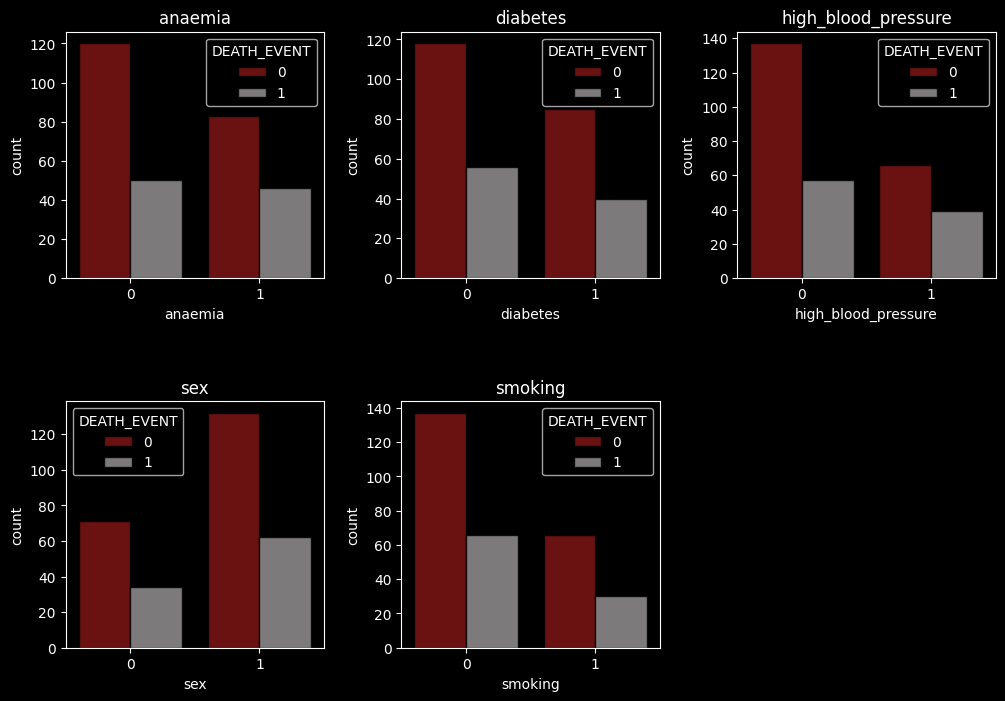

In [16]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i + 1)
    plt.title(col)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    sns.countplot(
        data=df,
        x=col,
        hue="DEATH_EVENT",
        palette=["#990303", "#9C9999"],
        alpha=0.8,
        edgecolor="k",
        linewidth=1,
    )

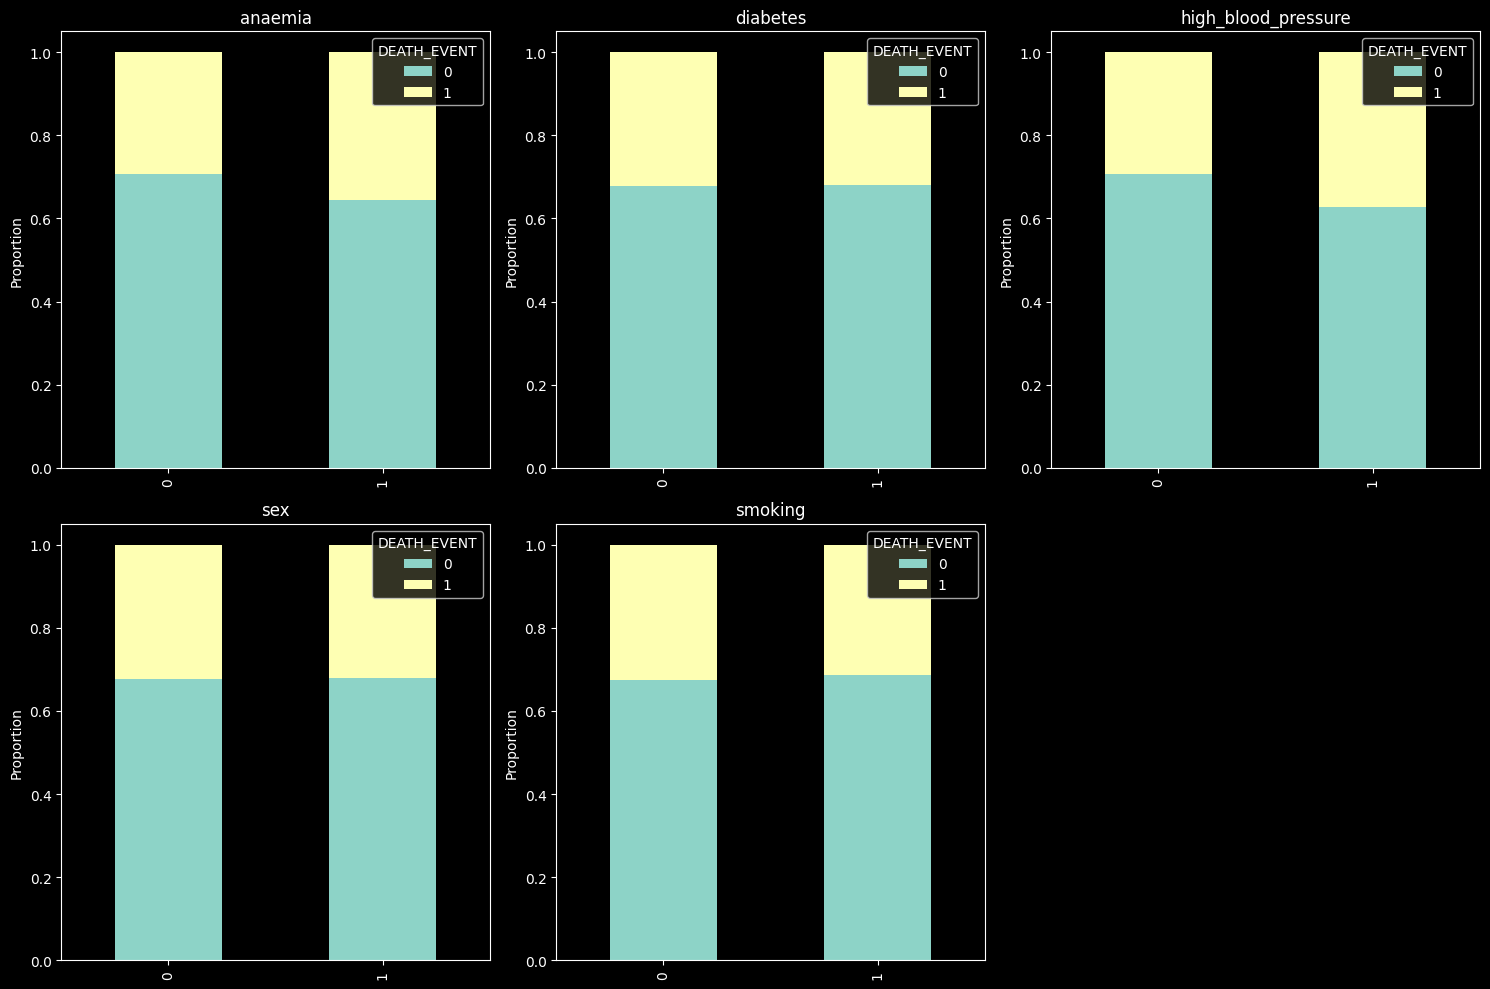

In [17]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)

    # 각 특성에 대해 DEATH_EVENT의 비율 계산
    prop_df = df.groupby(col)["DEATH_EVENT"].value_counts(normalize=True).unstack()

    # 100% 누적 막대 그래프 그리기
    prop_df.plot(kind="bar", stacked=True, ax=plt.gca())

    plt.title(col)
    plt.xlabel("")
    plt.ylabel("Proportion")
    plt.legend(title="DEATH_EVENT", loc="upper right")

plt.tight_layout()
plt.show()

**Standardizaiton?**

tree기반 모델의 경우 임계점 기반 분할이기에 결과상 큰 의미 없다. 다만 다른 알고리즘들과의 비교에서 일관성을 유지하기 위해 표준화 작업 후 하기도 한다. 

또한 보다 더 정교한, refine된 ensemble로 갈 경우 표준화가 영향을 미칠 수 있다. 

**Dummy for categorical?**

이 데이터는 모두 범주형 변수가 모두 binary (2-class, 0,1) 추가적으로 더 해줄 필요가 없는 것으로 보인다.

In [18]:
# dt = DecisionTreeClassifier(criterion='gini',  max_depth=5)
dt = DecisionTreeClassifier(criterion="gini", max_leaf_nodes=8)
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"].values
dt.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,class_weight,None


0.8929765886287625
0.8929765886287625


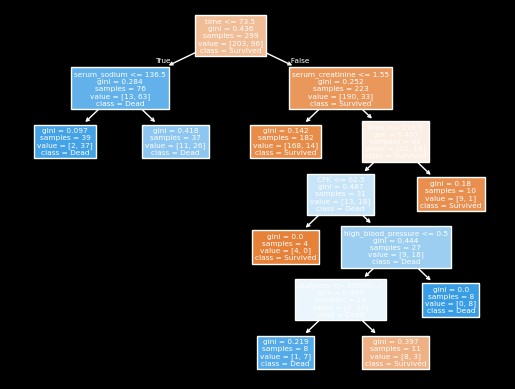

In [19]:
print(dt.score(X, y))  # Training Accuracy // Regression 의 경우 score default는 R^2
print((dt.predict(X) == y).mean())  # Training Accuracy
tree.plot_tree(
    dt, filled=True, feature_names=X.columns, class_names=["Survived", "Dead"]
)
plt.rcParams["figure.figsize"] = [35, 35]

## Random Forest

Note: **Bagging** is a special case of random forests. 

Bootstrap 샘플에서 선택되는 변수의 수를 원래 변수의 수와 같게 하면 Bagging (no random feature selection in bagging)

In [20]:
# Bagging
n, p = X.shape

dep = 5  # large -> may overfit
bagging = RandomForestClassifier(
    n_estimators=500,
    criterion="gini",
    max_depth=dep,
    n_jobs=-1,
    max_features=p,  # bagging=p, 일반 random forest- 'sqrt'
    oob_score=True,  # OOB Error rate 추정
    random_state=1,
)
bagging.fit(X, y)
print(f"Training Accuracy: {bagging.score(X,y)}")
print(f"OOB Score: {bagging.oob_score_}")

Training Accuracy: 0.9565217391304348
OOB Score: 0.8193979933110368


In [21]:
feature_map = pd.DataFrame(
    sorted(zip(bagging.feature_importances_, X.columns), reverse=True),
    columns=["Score", "Feature"],
)
print(feature_map)

       Score              Feature
0   0.536212                 time
1   0.129432     serum_creatinine
2   0.088445    ejection_fraction
3   0.066613                  CPK
4   0.053472                  age
5   0.047253         serum_sodium
6   0.047214            platelets
7   0.007016             diabetes
8   0.006834  high_blood_pressure
9   0.006366                  sex
10  0.005660              anaemia
11  0.005483              smoking


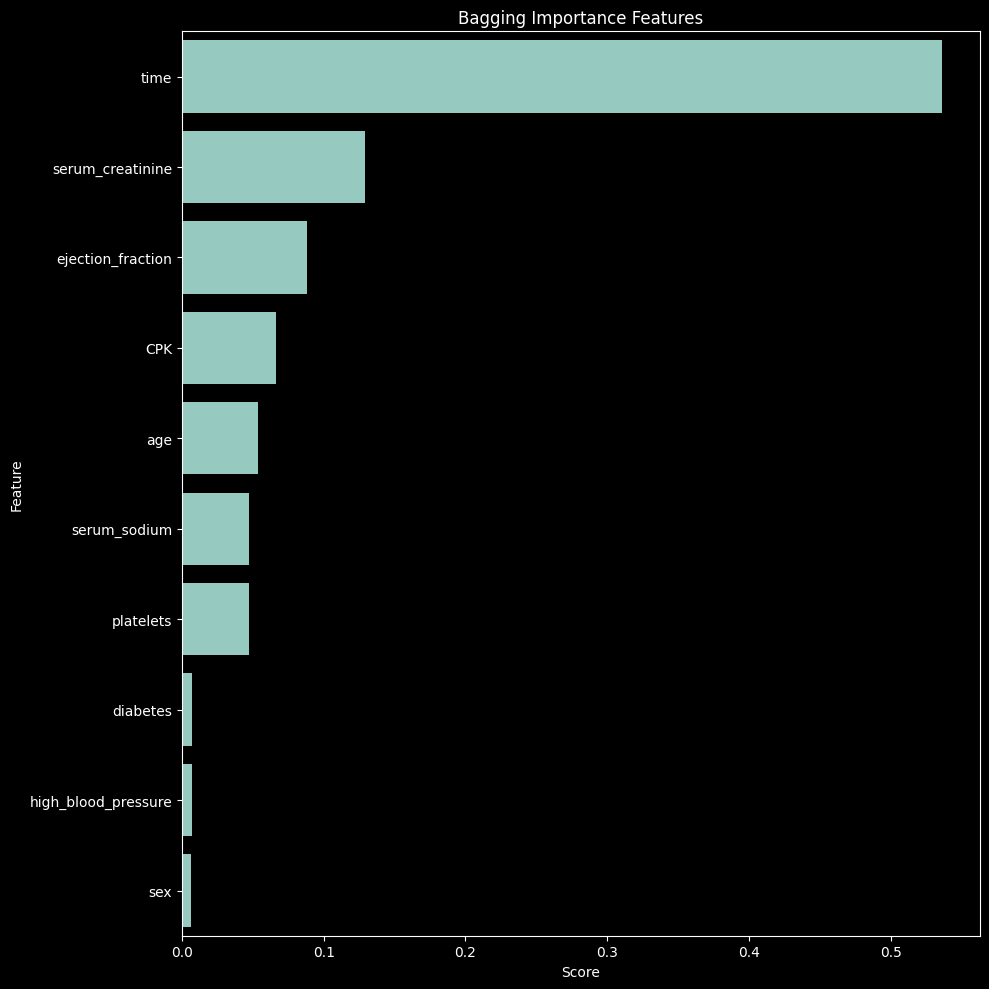

In [22]:
# Importance Score Top 10
feature_map_10 = feature_map.iloc[:10]
plt.figure(figsize=(10, 10))
sns.barplot(
    x="Score", y="Feature", data=feature_map_10.sort_values(by="Score", ascending=False)
)
plt.title("Bagging Importance Features")
plt.tight_layout()
plt.show()

In [23]:
# Random Forest
n, p = X.shape

dep = 5  # large -> may overfit
rf5 = RandomForestClassifier(
    n_estimators=500,
    criterion="gini",
    max_depth=dep,
    n_jobs=-1,
    max_features="sqrt",  # bagging=p, 일반 random forest- 'sqrt'
    oob_score=True,
    random_state=1,
)
rf5.fit(X, y)
print(f"Training Accuracy: {rf5.score(X,y)}")
print(f"OOB Score: {rf5.oob_score_}")

Training Accuracy: 0.939799331103679
OOB Score: 0.8494983277591973


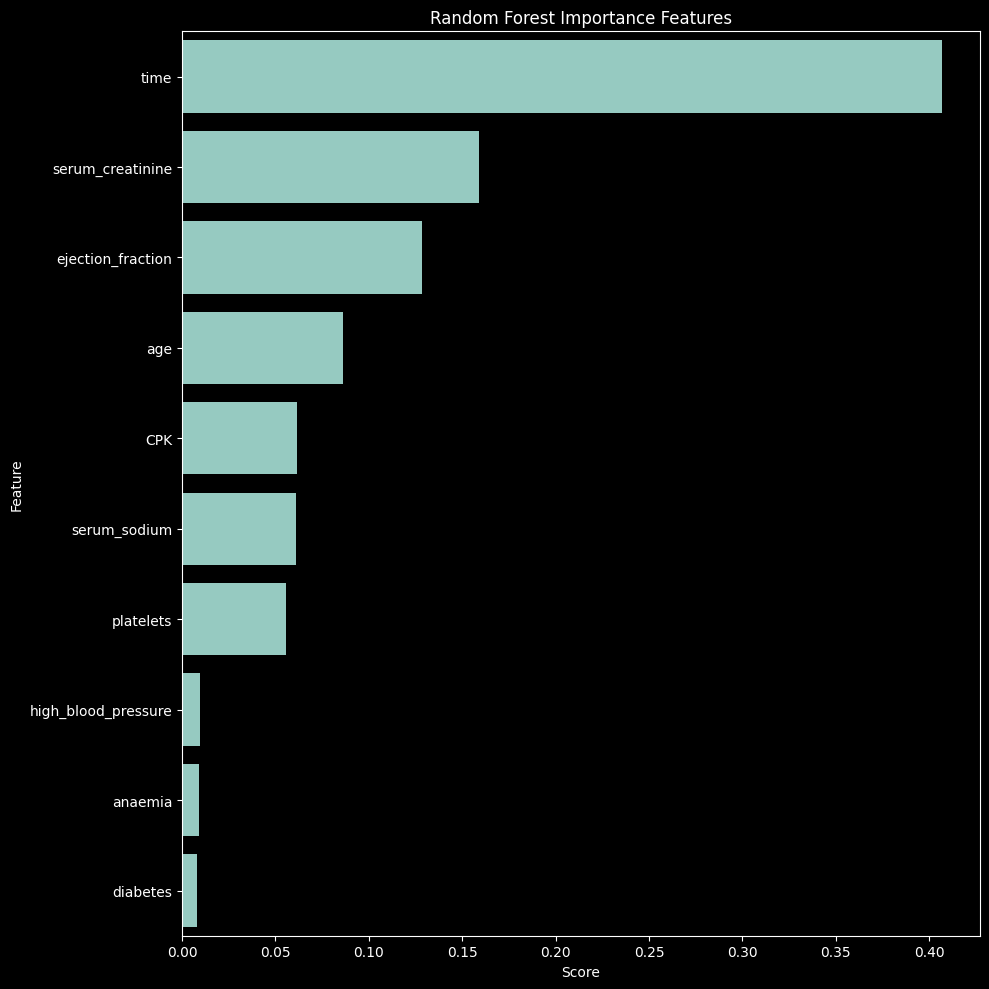

In [24]:
feature_map = pd.DataFrame(
    sorted(zip(rf5.feature_importances_, X.columns), reverse=True),
    columns=["Score", "Feature"],
)

# Importance Score Top 10
feature_map_10 = feature_map.iloc[:10]
plt.figure(figsize=(10, 10))
sns.barplot(
    x="Score", y="Feature", data=feature_map_10.sort_values(by="Score", ascending=False)
)
plt.title("Random Forest Importance Features")
plt.tight_layout()
plt.show()

### Hyperparamter Tuning

주요 하이퍼파라미터 선정:

- n_estimators: 트리의 개수
- max_depth: 트리의 최대 깊이
- min_samples_split: 내부 노드를 분할하기 위한 최소 샘플 수
- min_samples_leaf: 리프 노드가 가져야 할 최소 샘플 수
- max_features: 각 분할에서 고려할 특성의 수 (auto or sqrt)

**교차검증**
1. Parameter grid 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

2. 사용할 CV 선택
- ``GridSearchCV``: 모든 조합을 탐색 (시간이 오래 걸림)
- ``RandomizedSearchCV``: 무작위로 조합을 선택하여 탐색 (더 빠름)

**OOB 기반**
Bagging/Random Forest의 경우 OOB Sample 기반 튜닝 가능하다.
- 추가적인 데이터 분할 필요 없음
- 계산 효율성 좋음 (더 빠름)
- ``n_estimators`` 이 너무 작거나 튜닝에는 부적합할 수 있음.




### 교차검증

In [ ]:
import pandas as pd
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# Decision Tree - 파라미터 그리드 설정
dt_param_grid = {
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt"],
}

dt_random_grid = {
    "max_depth": list(range(10, 31)) + [None],
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 5),
    "max_features": ["sqrt"],
}

# Bagging - 파라미터 그리드 설정
bag_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
}

bag_random_grid = {
    "n_estimators": range(100, 301),
    "max_samples": list(np.linspace(0.5, 1.0, 10)),
    "max_features": list(np.linspace(0.5, 1.0, 10)),
}

# Random Forest - 파라미터 그리드 설정
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt"],
}

rf_random_grid = {
    "n_estimators": range(100, 301, 50),
    "max_depth": list(range(10, 31)) + [None],
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 5),
    "max_features": ["sqrt"],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Decision Tree - GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=1),
    param_grid=dt_param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=2,
)
grid_search_dt.fit(X_train, y_train)

# Decision Tree - RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=1),
    param_distributions=dt_random_grid,
    n_iter=100,
    cv=cv,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
random_search_dt.fit(X_train, y_train)

# Bagging - GridSearchCV
grid_search_bag = GridSearchCV(
    estimator=BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=1), random_state=1
    ),
    param_grid=bag_param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=2,
)
grid_search_bag.fit(X_train, y_train)

# Bagging - RandomizedSearchCV
random_search_bag = RandomizedSearchCV(
    estimator=BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=1), random_state=1
    ),
    param_distributions=bag_random_grid,
    n_iter=100,
    cv=cv,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
random_search_bag.fit(X_train, y_train)

# Random Forest - GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=rf_param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=2,
)
grid_search_rf.fit(X_train, y_train)

# Random Forest - RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_distributions=rf_random_grid,
    n_iter=100,
    cv=cv,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
random_search_rf.fit(X_train, y_train)

# Best parameters 및 best score 저장
best_params = {
    "Decision Tree GridSearchCV": grid_search_dt.best_params_,
    "Decision Tree RandomizedSearchCV": random_search_dt.best_params_,
    "Bagging GridSearchCV": grid_search_bag.best_params_,
    "Bagging RandomizedSearchCV": random_search_bag.best_params_,
    "Random Forest GridSearchCV": grid_search_rf.best_params_,
    "Random Forest RandomizedSearchCV": random_search_rf.best_params_,
}

best_scores = {
    "Decision Tree GridSearchCV": grid_search_dt.best_score_,
    "Decision Tree RandomizedSearchCV": random_search_dt.best_score_,
    "Bagging GridSearchCV": grid_search_bag.best_score_,
    "Bagging RandomizedSearchCV": random_search_bag.best_score_,
    "Random Forest GridSearchCV": grid_search_rf.best_score_,
    "Random Forest RandomizedSearchCV": random_search_rf.best_score_,
}

# 결과 출력
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_spli

In [25]:
print("\nBest Scores:")
for key, value in best_scores.items():
    print(f"{key}: {value}")


Best Scores:
Decision Tree GridSearchCV: 0.8088269454123113
Decision Tree RandomizedSearchCV: 0.8134727061556332
Bagging GridSearchCV: 0.8562137049941928
Bagging RandomizedSearchCV: 0.8610917537746806
Random Forest GridSearchCV: 0.8706155632984901
Random Forest RandomizedSearchCV: 0.8754936120789779


In [ ]:
from sklearn.metrics import classification_report, accuracy_score


def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"{name} Best Model Evaluation on Test Set")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


# 모델 평가
best_grid_dt_model = grid_search_dt.best_estimator_
evaluate_model("Decision Tree GridSearchCV", best_grid_dt_model, X_test, y_test)

best_random_dt_model = random_search_dt.best_estimator_
evaluate_model("Decision Tree RandomizedSearchCV", best_random_dt_model, X_test, y_test)

best_grid_bag_model = grid_search_bag.best_estimator_
evaluate_model("Bagging GridSearchCV", best_grid_bag_model, X_test, y_test)

best_random_bag_model = random_search_bag.best_estimator_
evaluate_model("Bagging RandomizedSearchCV", best_random_bag_model, X_test, y_test)

best_grid_rf_model = grid_search_rf.best_estimator_
evaluate_model("Random Forest GridSearchCV", best_grid_rf_model, X_test, y_test)

best_random_rf_model = random_search_rf.best_estimator_
evaluate_model("Random Forest RandomizedSearchCV", best_random_rf_model, X_test, y_test)

Decision Tree GridSearchCV Best Model Evaluation on Test Set
Accuracy: 0.6888888888888889
Decision Tree RandomizedSearchCV Best Model Evaluation on Test Set
Accuracy: 0.7777777777777778
Bagging GridSearchCV Best Model Evaluation on Test Set
Accuracy: 0.8111111111111111
Bagging RandomizedSearchCV Best Model Evaluation on Test Set
Accuracy: 0.8
Random Forest GridSearchCV Best Model Evaluation on Test Set
Accuracy: 0.8111111111111111
Random Forest RandomizedSearchCV Best Model Evaluation on Test Set
Accuracy: 0.8222222222222222


### ``time`` 변수가 가장 중요한 변수? 모델에 적합한가?

분석에 사용된 데이터에서 ``time`` 변수는 추적 관찰 기간을 의미합니다. 그리고 예측하고자 하는 목표 변수인 **DEATH_EVENT**는 관찰 기간 내 환자의 사망 여부입니다.

- 만약 모델이 ``time`` 변수를 학습에 사용하게 되면 다음과 같은 문제가 발생할 수 있습니다.

- ``time``이 짧을수록 사망했을 확률이 높다는 잘못된 연관 관계를 학습하게 됩니다. 예를 들어, 관찰 기간이 짧은 환자가 사망했다면, 모델은 단순히 'time'이 짧다는 이유만으로 사망을 예측하게 될 수 있습니다.

이는 실제 임상 현장에서 환자의 기본 건강 상태를 바탕으로 사망 위험을 예측하려는 모델의 본래 목적과 어긋납니다. 우리는 환자의 초기 건강 상태를 나타내는 다른 변수들을 통해 사망 여부를 예측하고 싶어 하는 것이지, 관찰 기간 자체를 예측의 근거로 삼으려는 것이 아닙니다.



In [ ]:
# 시간 변수 drop
X_time_drop = X.drop(columns=["time"])
display(X_time_drop)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,CPK
0,75.0,0,0,20,1,265000.00,1.9,130,1,0,582
1,55.0,0,0,38,0,263358.03,1.1,136,1,0,7861
2,65.0,0,0,20,0,162000.00,1.3,129,1,1,146
3,50.0,1,0,20,0,210000.00,1.9,137,1,0,111
4,65.0,1,1,20,0,327000.00,2.7,116,0,0,160
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,1,38,1,155000.00,1.1,143,1,1,61
295,55.0,0,0,38,0,270000.00,1.2,139,0,0,1820
296,45.0,0,1,60,0,742000.00,0.8,138,0,0,2060
297,45.0,0,0,38,0,140000.00,1.4,140,1,1,2413


In [ ]:
import pandas as pd
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    StratifiedKFold,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_time_drop, y, test_size=0.3, random_state=1, stratify=y
)

# Decision Tree - 파라미터 그리드 설정
dt_param_grid = {
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt"],
}

dt_random_grid = {
    "max_depth": list(range(10, 31)) + [None],
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 5),
    "max_features": ["sqrt"],
}

# Bagging - 파라미터 그리드 설정
bag_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_samples": [0.5, 0.7, 1.0],
    "max_features": [0.5, 0.7, 1.0],
}

bag_random_grid = {
    "n_estimators": range(100, 301),
    "max_samples": list(np.linspace(0.5, 1.0, 10)),
    "max_features": list(np.linspace(0.5, 1.0, 10)),
}

# Random Forest - 파라미터 그리드 설정
rf_param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt"],
}

rf_random_grid = {
    "n_estimators": range(100, 301, 50),
    "max_depth": list(range(10, 31)) + [None],
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 5),
    "max_features": ["sqrt"],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Decision Tree - GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=1),
    param_grid=dt_param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=2,
)
grid_search_dt.fit(X_train, y_train)

# Decision Tree - RandomizedSearchCV
random_search_dt = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=1),
    param_distributions=dt_random_grid,
    n_iter=100,
    cv=cv,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
random_search_dt.fit(X_train, y_train)

# Bagging - GridSearchCV
grid_search_bag = GridSearchCV(
    estimator=BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=1), random_state=1
    ),
    param_grid=bag_param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=2,
)
grid_search_bag.fit(X_train, y_train)

# Bagging - RandomizedSearchCV
random_search_bag = RandomizedSearchCV(
    estimator=BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=1), random_state=1
    ),
    param_distributions=bag_random_grid,
    n_iter=100,
    cv=cv,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
random_search_bag.fit(X_train, y_train)

# Random Forest - GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_grid=rf_param_grid,
    cv=cv,
    n_jobs=-1,
    verbose=2,
)
grid_search_rf.fit(X_train, y_train)

# Random Forest - RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=1),
    param_distributions=rf_random_grid,
    n_iter=100,
    cv=cv,
    random_state=1,
    n_jobs=-1,
    verbose=2,
)
random_search_rf.fit(X_train, y_train)

# Best parameters 및 best score 저장
best_params = {
    "Decision Tree GridSearchCV": grid_search_dt.best_params_,
    "Decision Tree RandomizedSearchCV": random_search_dt.best_params_,
    "Bagging GridSearchCV": grid_search_bag.best_params_,
    "Bagging RandomizedSearchCV": random_search_bag.best_params_,
    "Random Forest GridSearchCV": grid_search_rf.best_params_,
    "Random Forest RandomizedSearchCV": random_search_rf.best_params_,
}

best_scores = {
    "Decision Tree GridSearchCV": grid_search_dt.best_score_,
    "Decision Tree RandomizedSearchCV": random_search_dt.best_score_,
    "Bagging GridSearchCV": grid_search_bag.best_score_,
    "Bagging RandomizedSearchCV": random_search_bag.best_score_,
    "Random Forest GridSearchCV": grid_search_rf.best_score_,
    "Random Forest RandomizedSearchCV": random_search_rf.best_score_,
}

# 결과 출력
print("Best Parameters:")
for key, value in best_params.items():
    print(f"{key}: {value}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1

In [ ]:
print("\nBest Scores:")
for key, value in best_scores.items():
    print(f"{key}: {value}")


Best Scores:
Decision Tree GridSearchCV: 0.7085946573751452
Decision Tree RandomizedSearchCV: 0.7271777003484321
Bagging GridSearchCV: 0.7606271777003484
Bagging RandomizedSearchCV: 0.7607433217189314
Random Forest GridSearchCV: 0.7511033681765389
Random Forest RandomizedSearchCV: 0.7463414634146341
